<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Week-2-IP/blob/main/Financial_Inclusion_in_East_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion in East Africa

## 1. Defining the Question

### a) Question Specification

Which individuals are most likely to have or user a bank account?

### b) Metric for Success

Identifying and predicting the individuals who are most likely to have or use a bank account.

### c) Analysis context

* The analysis is based on East African countries, and aims to study the financial inclusion in the region. The main indicator will be the access to bank accounts.
* The accuracy might not be excellent as it depends on how well the data was collected, and how much the variables answer our question.



### d) Experimental Design

The following list depicts the steps taken to answer the analysis question.
1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Implementing the solution
10. Challenging the solution
11. Follow up questions.


### e) Data Relevance

* The data should have variables that adequately contribute to answering the target question.
* The dataset should lead to high prediction accuracy when trained on the model.

## 2. Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
from scipy import stats
import os
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 3. Loading the Dataset

In [ ]:
# Mounting Google Drive to allow for easy acces to the database table 
%cd ..
from google.colab import drive
drive.mount('/content/drive')

# Acessing the required Google Drive directory
os.chdir("/content/drive/MyDrive/Core/Moringa Core Week 2 IP")

# Dataset Loading
financial_inclusion = pd.read_csv('Financial Dataset - 1.csv')

/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 4. Data Understanding

Number of records.

In [ ]:
print(f'The dataset has {financial_inclusion.shape[0]} records, and {financial_inclusion.shape[1]} columns.')

The dataset has 23524 records, and 13 columns.


Dataset Preview.

In [ ]:
financial_inclusion.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
financial_inclusion.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


Dataset information summary.

In [ ]:
financial_inclusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


The columns have the correct data types.

## 5. External Data Source Validation

1. The CBK in 2019 on the Kenya's financial inclusion [link](https://www.centralbank.go.ke/uploads/financial_inclusion/2050404730_FinAccess%202019%20Household%20Survey-%20Jun.%2014%20Version.pdf).
2. The Nation Institute of Statistics in Rwanda [link](http://www.statistics.gov.rw/publication/finscope-rwanda-2016).
3. The Financial Sector Deepening Trust in Tanzania [link](https://www.fsdt.or.tz/wp-content/uploads/2017/09/Finscope.pdf).
4. The World Bank Ugandan Financial Access Progress [link](https://ufa.worldbank.org/en/country-progress/uganda). 

* The studies above also focus on the dataset variables, and from the dataset preview, the data is close to those depicted in the studies.
* Furthermore, after analyzing the data, the findings are similar to those found in the study, this further proves the validity of the dataset.

## 6. Data Preperation

### a) Validation

In [ ]:
# The uniqueid column is irrelevant to the experiment, and needs to removed.
financial_inclusion.drop('uniqueid', axis = 1, inplace = True)

### b) Completeness

**Dropping Values**

In [ ]:
# Checking for the presence of missing values.
financial_inclusion.isnull().sum()

country                   14
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
financial_inclusion[financial_inclusion.country.isnull()][['year', 'country']]

,year,country
18200,2017,NaN
18201,2017,NaN
18202,2017,NaN
18203,2017,NaN
18204,2017,NaN
18205,2017,NaN
18206,2017,NaN
18207,2017,NaN
18208,2017,NaN
18312,2017,NaN


In [ ]:
# 2017 country
financial_inclusion[financial_inclusion.year == 2017]['country'].unique()

array(['Tanzania', nan], dtype=object)

In [ ]:
financial_inclusion.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Filling the column
financial_inclusion.country.fillna('Tanzania', inplace = True)

In [ ]:
# Test dataset to be used in the challenge section
test_data = financial_inclusion.copy()

In [ ]:
# Checking overall changes
financial_inclusion.isnull().sum()


country                    0
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

As the data has a large number of records, to maintain the state of the sample, the missing values will be dropped.

In [ ]:
# Dropping missing values.
financial_inclusion.dropna(inplace = True)

In [ ]:
# Confirming changes.
financial_inclusion.isnull().any().any()

False

All missing values have been removed.

**Imputing Values**

In [ ]:
# Viewing columns
test_data.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Cateorical columns
target = ['Has a Bank account', 'Type of Location', 'Cell Phone Access', 
          'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job']

In [ ]:
# Imputing categorical columns with the most frequent observation
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
test_data[target] = imputer.fit_transform(test_data[target])

In [ ]:
# Numerical columns
target2 = ['household_size', 'Respondent Age']

In [ ]:
# Imputing numerical columns with the mean frequent observation
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
test_data[target2] = imputer.fit_transform(test_data[target2])

In [ ]:
# Results
test_data.isnull().sum()

country                   0
year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

### c) Consistency

In [ ]:
# Checking for duplicates.
financial_inclusion.duplicated().any().any()

True

In [ ]:
# Dropping duplicates.
financial_inclusion.drop_duplicates(inplace = True)

### d) Uniformity

Renaming columns.

In [ ]:
# Function definition.
def RenameColumns(columns, data):
  new_name = []
  for col in columns:
    col = col.lower().replace(" ","_")
    new_name.append(col)
  data.columns = new_name

# Function call.
RenameColumns(list(financial_inclusion.columns), financial_inclusion)
RenameColumns(list(test_data.columns), test_data)


In [ ]:
# Confirming column name change.
financial_inclusion.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

Renaming columns

In [ ]:
financial_inclusion.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'location', 'cell_phone_access': 'cellphone', 'respondent_age': 'age', 'gender_of_respondent': 'gender',
                            'the_relathip_with_head': 'relationship', 'level_of_educuation': 'education', 'type_of_job': 'job_type'}, axis = 1, inplace = True)

In [ ]:
test_data.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'location', 'cell_phone_access': 'cellphone', 'respondent_age': 'age', 'gender_of_respondent': 'gender',
                            'the_relathip_with_head': 'relationship', 'level_of_educuation': 'education', 'type_of_job': 'job_type'}, axis = 1, inplace = True)

In [ ]:
# Confirming changes.
financial_inclusion.columns

Index(['country', 'year', 'bank_account', 'location', 'cellphone',
       'household_size', 'age', 'gender', 'relationship', 'marital_status',
       'education', 'job_type'],
      dtype='object')

Changing data types

In [ ]:
# Changing the household size and age columns from float to integer
financial_inclusion[['age','household_size']] = financial_inclusion[['age','household_size']].astype('int64')
test_data[['age','household_size']] = test_data[['age','household_size']].astype('int64')

In [ ]:
# Checking the year column
def Year(coutries,year):
  for country in countries:
    print(f'{country} : {financial_inclusion[financial_inclusion.country == country][year].unique()}')

countries = ['Rwanda','Uganda', 'Kenya', 'Tanzania']
Year(countries, 'year')

Rwanda : [2016 2039]
Uganda : [2018]
Kenya : [2018 2029 2056]
Tanzania : [2017]


In [ ]:
# Restricting the study to past years
financial_inclusion = financial_inclusion[(financial_inclusion.year != 2039) & (financial_inclusion.year != 2029) & (financial_inclusion.year != 2056)]
test_data = test_data[(test_data.year != 2039) & (test_data.year != 2029) & (test_data.year != 2056)]
# Confirming changes
Year(countries, 'year')

Rwanda : [2016]
Uganda : [2018]
Kenya : [2018]
Tanzania : [2017]


* The year column only depicts the year the data was collected for each country. It cannot be used to compare the perfromance of all the countries.
* It can only be used to compare the performance of Kenya and Tanzania in 2018.

In [ ]:
# Confirming changes
financial_inclusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18978 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         18978 non-null  object
 1   year            18978 non-null  int64 
 2   bank_account    18978 non-null  object
 3   location        18978 non-null  object
 4   cellphone       18978 non-null  object
 5   household_size  18978 non-null  int64 
 6   age             18978 non-null  int64 
 7   gender          18978 non-null  object
 8   relationship    18978 non-null  object
 9   marital_status  18978 non-null  object
 10  education       18978 non-null  object
 11  job_type        18978 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.9+ MB


### e) Outliers

In [ ]:
# Selecting continuous columns only.
numerical = list(financial_inclusion.select_dtypes(exclude=['object']).columns)
numerical

['year', 'household_size', 'age']

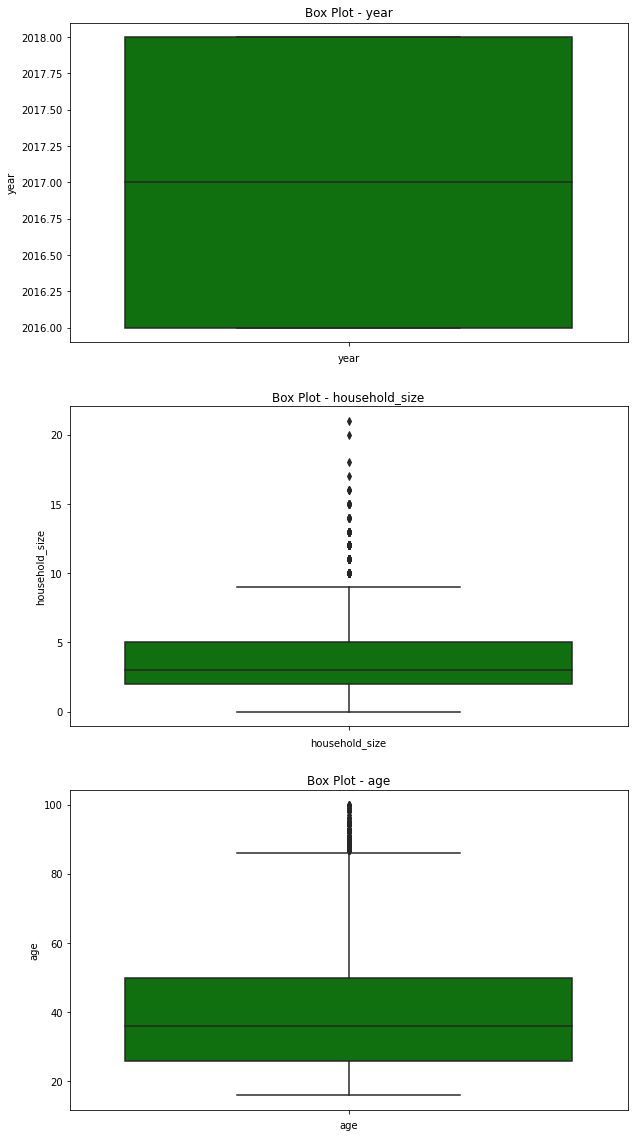

In [ ]:
# Checking for outliers
fig, ax = plt.subplots(len(numerical), figsize = (10,20))
for i, col_name in enumerate(numerical):
  sns.boxplot(y = financial_inclusion[col_name], ax = ax[i], color = 'green')
  ax[i].set_title(f'Box Plot - {col_name}')
  ax[i].set_xlabel(col_name)

plt.show()

Both columns have missing values.

Removing outliers to minimize skew.

In [ ]:
# New dataset
financial_inclusion_cleaned = financial_inclusion.copy()
test_data_cleaned = test_data.copy()

In [ ]:
# IQR

Q1 = financial_inclusion_cleaned[numerical].quantile(0.25)
Q3 = financial_inclusion_cleaned[numerical].quantile(0.75)
IQR = Q3 - Q1

Q1_2 = test_data_cleaned[numerical].quantile(0.25)
Q3_2 = test_data_cleaned[numerical].quantile(0.75)
IQR2 = Q3_2 - Q1_2

financial_inclusion_cleaned = financial_inclusion_cleaned[~((financial_inclusion_cleaned[numerical] < (Q1 - 1.5 * IQR)) |(financial_inclusion_cleaned[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]
test_data_cleaned = test_data_cleaned[~((test_data_cleaned[numerical] < (Q1_2 - 1.5 * IQR2)) |(test_data_cleaned[numerical] > (Q3_2 + 1.5 * IQR2))).any(axis=1)]

In [ ]:
# Confirming changes
outliers = financial_inclusion.shape[0] - financial_inclusion_cleaned.shape[0]
print(f'Outliers removed = {outliers}')


Outliers removed = 503


In [ ]:
# Confirming changes
outliers = test_data.shape[0] - test_data.shape[0]
print(f'Outliers removed = {outliers}')

Outliers removed = 0


## 7. Descriptive Analysis

**The year column only depicts the year of collection, therefore, it will rarely be used in the analysis.**

In [ ]:
# Dataset summary statistics
financial_inclusion_cleaned.describe()

,year,household_size,age
count,18475.000000,18475.000000,18475.000000
mean,2017.040162,3.612991,39.250392
std,0.862477,2.128172,16.576617
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,36.000000
75%,2018.000000,5.000000,50.000000
max,2018.000000,9.000000,86.000000


### a) Univariate Analysis

#### i) Categorical Columns

In [ ]:
# Getting the categorical columns
categorical = list(financial_inclusion_cleaned.select_dtypes(include = ['object']).columns)
categorical

['country',
 'bank_account',
 'location',
 'cellphone',
 'gender',
 'relationship',
 'marital_status',
 'education',
 'job_type']

Plots

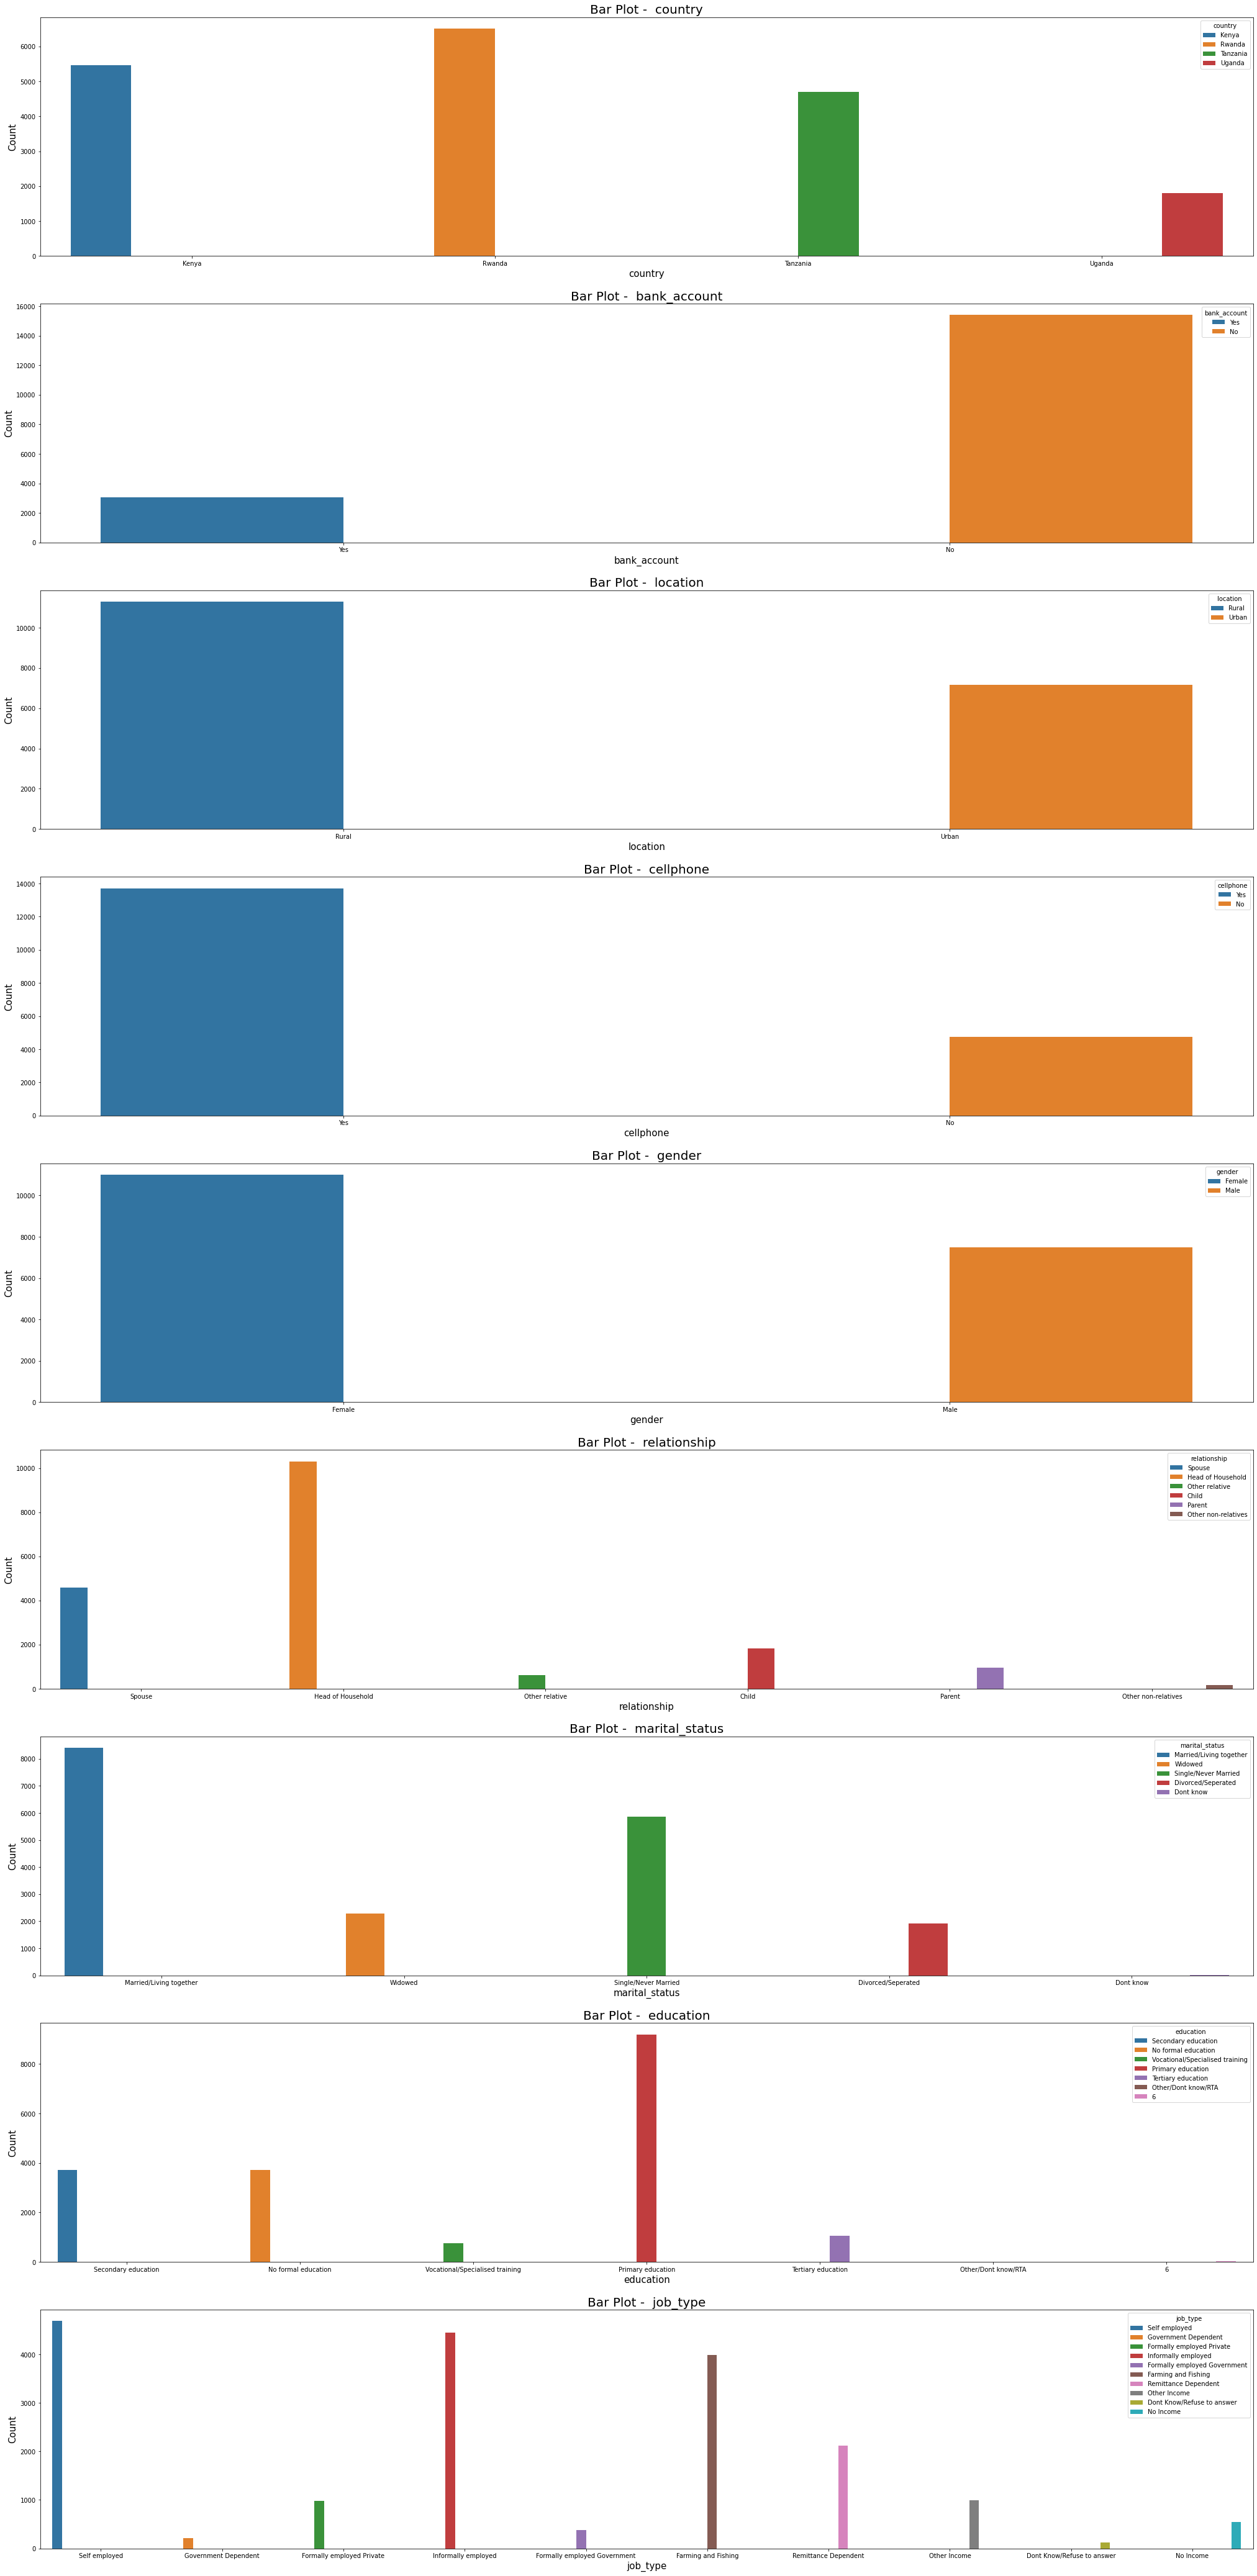

In [ ]:
# Bar charts
def CatPlots(columns, data):
  color = ['brown', 'green', 'blue', 'orange','purple','magenta', 'red', 'cyan', 'yellow']
  fig,ax  = plt.subplots(len(columns), figsize = (35,75))
  for i,col_name in enumerate(columns):
      sns.countplot(data[col_name], ax=ax[i], hue = data[col_name], orient = 'v')
      ax[i].set_title('Bar Plot -  '+ col_name, fontsize=20)
      ax[i].set_xlabel(col_name, fontsize=15)
      ax[i].set_ylabel('Count', fontsize=15)

  plt.show()

CatPlots(categorical, financial_inclusion_cleaned)

Observations

In [ ]:
# Order of the number of observations per category for each column in descending order.
for cat in categorical:
  print(financial_inclusion_cleaned[cat].value_counts(), "\n")

Rwanda      6515
Kenya       5457
Tanzania    4703
Uganda      1800
Name: country, dtype: int64 

No     15398
Yes     3077
Name: bank_account, dtype: int64 

Rural    11296
Urban     7179
Name: location, dtype: int64 

Yes    13718
No      4757
Name: cellphone, dtype: int64 

Female    10997
Male       7478
Name: gender, dtype: int64 

Head of Household      10308
Spouse                  4589
Child                   1821
Parent                   949
Other relative           631
Other non-relatives      177
Name: relationship, dtype: int64 

Married/Living together    8406
Single/Never Married       5864
Widowed                    2281
Divorced/Seperated         1916
Dont know                     8
Name: marital_status, dtype: int64 

Primary education                  9197
Secondary education                3712
No formal education                3710
Tertiary education                 1064
Vocational/Specialised training     761
6                                    25
Other/Dont know

#### ii) Numerical columns

**Measures of central tendency**

In [ ]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")
    

In [ ]:
# Mean
MeasureCentral('mean', numerical, financial_inclusion_cleaned)

year column mean = 2017.0401623815967
household_size column mean = 3.6129905277401893
age column mean = 39.25039242219215


In [ ]:
# Median
MeasureCentral('median', numerical, financial_inclusion_cleaned)

year column median = 2017.0
household_size column median = 3.0
age column median = 36.0


In [ ]:
# Mode
MeasureCentral('mode', numerical, financial_inclusion_cleaned)

year column mode = 0    2018
dtype: int64
household_size column mode = 0    2
dtype: int64
age column mode = 0    30
dtype: int64


* The mean and median of the year and household size columns are close, suggesting a close to normal distribution of values for both columns.
* However, the age median is lower than the mean, indicating a positive skew in the column.

**Measures of distribution**

In [ ]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [ ]:
# Range
MeasureDistribution('range', numerical, financial_inclusion_cleaned)

year column range = 2
household_size column range = 9
age column range = 70


The age column has the widest distribution.

In [ ]:
# IQR
MeasureDistribution('IQR', numerical, financial_inclusion_cleaned)

year column IQR = 2.0
household_size column IQR = 3.0
age column IQR = 24.0


In [ ]:
# Variance
MeasureDistribution('var', numerical, financial_inclusion_cleaned)

year column variance = 0.7438670300342449
household_size column variance = 4.529115636751393
age column variance = 274.7842202368164


In [ ]:
# Standard Deviation
MeasureDistribution('std', numerical, financial_inclusion_cleaned)

year column std = 0.8624772634882875
household_size column std = 2.1281719001883737
age column std = 16.576616670382904


The age and household size have wider dicstribution of values around the mean value.

In [ ]:
# Skewness
MeasureDistribution('skew', numerical, financial_inclusion_cleaned)

year column skew = -0.07720456164814808
household_size column skew = 0.5819324204887775
age column skew = 0.6941617325766856


* The year column is positively skewed, therefore, most of the year values low.
* However, the household size and age columns are negatively skewed.

In [ ]:
# Kurtosis
MeasureDistribution('kurt', numerical, financial_inclusion_cleaned)

year column kurt = -1.6514439133606444
household_size column kurt = -0.5525473594116121
age column kurt = -0.34229636164715505


All columns are platykurtic, as they have less distribution than that of a normal distribution (Kurtosis = 0).

**Numerical columns boxplots**

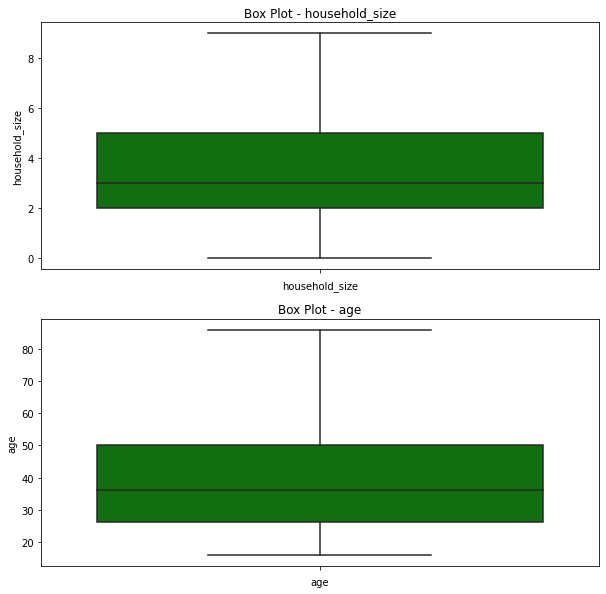

In [ ]:
# Boxplots for the numerical columns
fig, ax = plt.subplots(len(numerical[1:]), figsize = (10,10))
for i, col_name in enumerate(numerical[1:]):
  sns.boxplot(y = financial_inclusion_cleaned[col_name], ax = ax[i], color = 'green')
  ax[i].set_title(f'Box Plot - {col_name}')
  ax[i].set_xlabel(col_name)

plt.show()

* All outliers have been removed.
* The plots show that the columns distributions are skewed.

**Histograms**

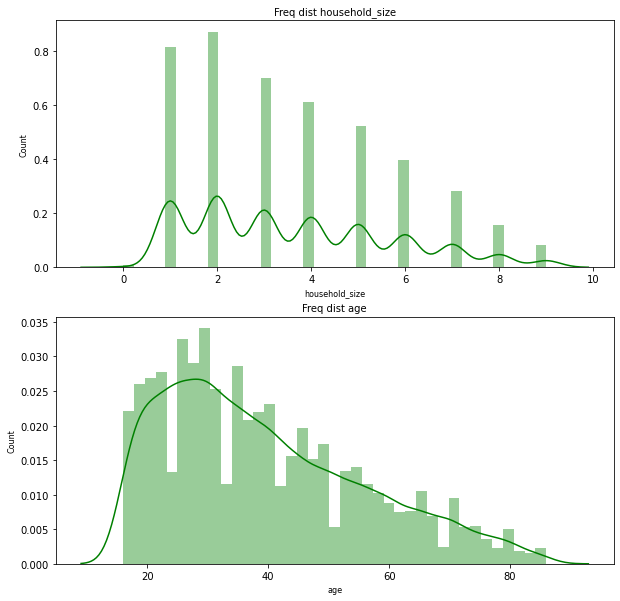

In [ ]:
fig,ax  = plt.subplots(len(numerical[1:]), figsize = (10,10))
for i,col_name in enumerate(numerical[1:]):
    sns.distplot(financial_inclusion_cleaned[col_name], hist=True, ax=ax[i], color = 'green')
    ax[i].set_title('Freq dist '+ col_name, fontsize=10)
    ax[i].set_xlabel(col_name, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

* 2018 had information on two countries, therefore, the year had the most records.
* Both the age and household size variables are positively skewed, therefore, most respondents have smaller households, and are younger in age.

### b) Bivariate Analysis

**i) Categorical-Categorical**

Analysis will be based on the bank account, as it has the most relevance for the study.

In [ ]:
categorical

['country',
 'bank_account',
 'location',
 'cellphone',
 'gender',
 'relationship',
 'marital_status',
 'education',
 'job_type']

In [ ]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def TabPlot(x, y, data):
  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5))
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = 0)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

**Bank Account Vs Country**

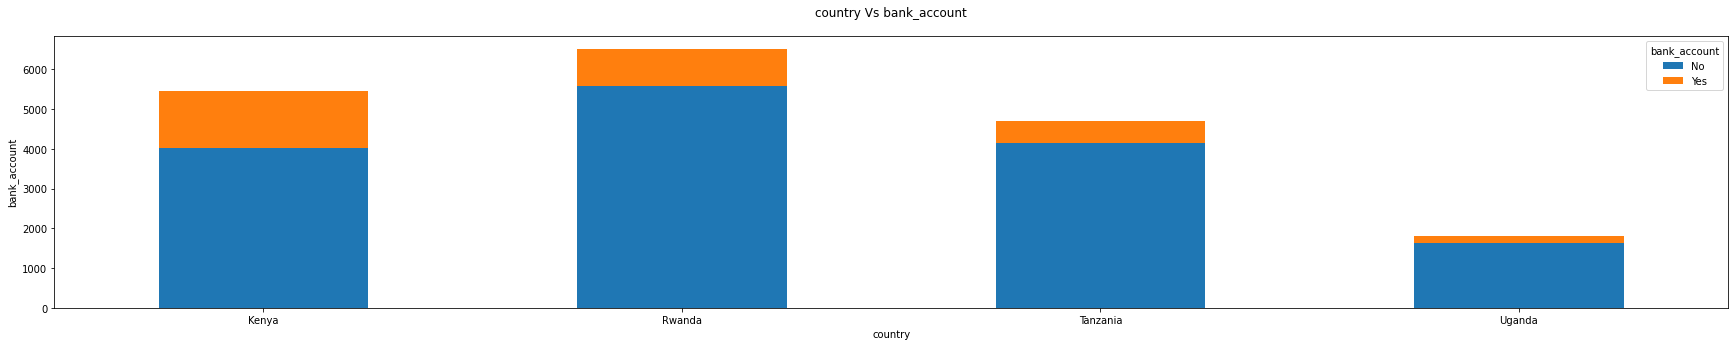

In [ ]:
# Checking bank account access in each country.
TabPlot('country', 'bank_account', financial_inclusion_cleaned)

* Most people in the countries do not have bank accounts.
* Rwanda has the highest number or records, followed by Kenya, Tanzania and finally Uganda.

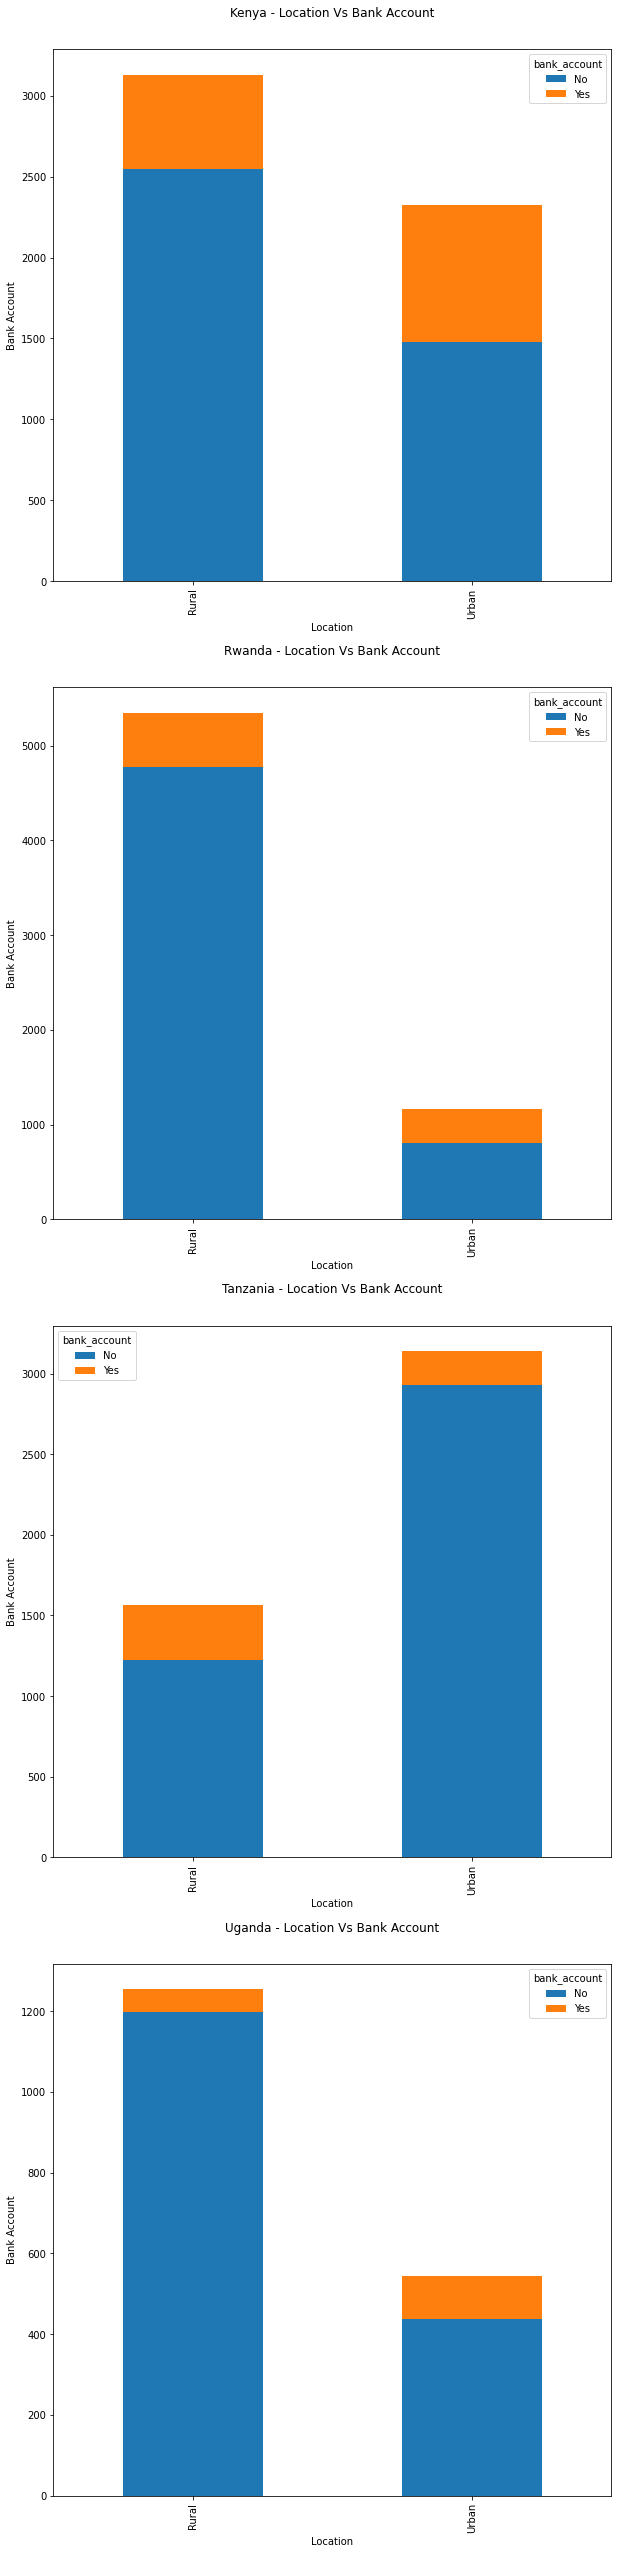

In [ ]:
# Checking which section of the countries are leading to the low numbers.
# Function that plots the location performance per country.
def PerCountry(countries,data):
  fig, ax = plt.subplots(len(countries), 1, figsize = (10,45))
  for i, country in enumerate(countries):
    table = pd.crosstab(data[data['country'] == country]['location'], data['bank_account'])
    table.plot.bar(stacked = True, ax = ax[i])
    ax[i].set_title(f'{country} - Location Vs Bank Account', y = 1.05, fontsize = 12)
    ax[i].set_xlabel('Location', fontsize = 10)
    ax[i].set_ylabel('Bank Account', fontsize = 10)
    
  plt.show()
countries = financial_inclusion_cleaned.country.unique()
PerCountry(countries, financial_inclusion_cleaned)

* Most respondents were from Rural regions in Kenya, Rwanda and Uganda.
* It is observed that most respondents do not have bank accounts.

**Bank Account Vs Cellphone**

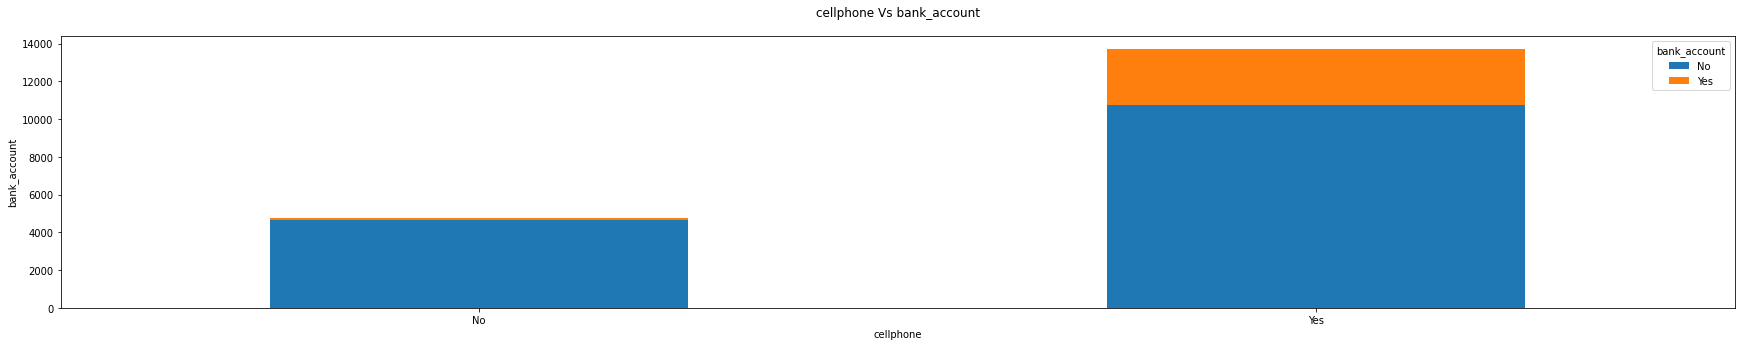

In [ ]:
# Plot
TabPlot('cellphone', 'bank_account', financial_inclusion_cleaned)

* Most respondents had cellphones.
* However, majority lacked bank accounts.

**Bank Accuont Vs Gender**

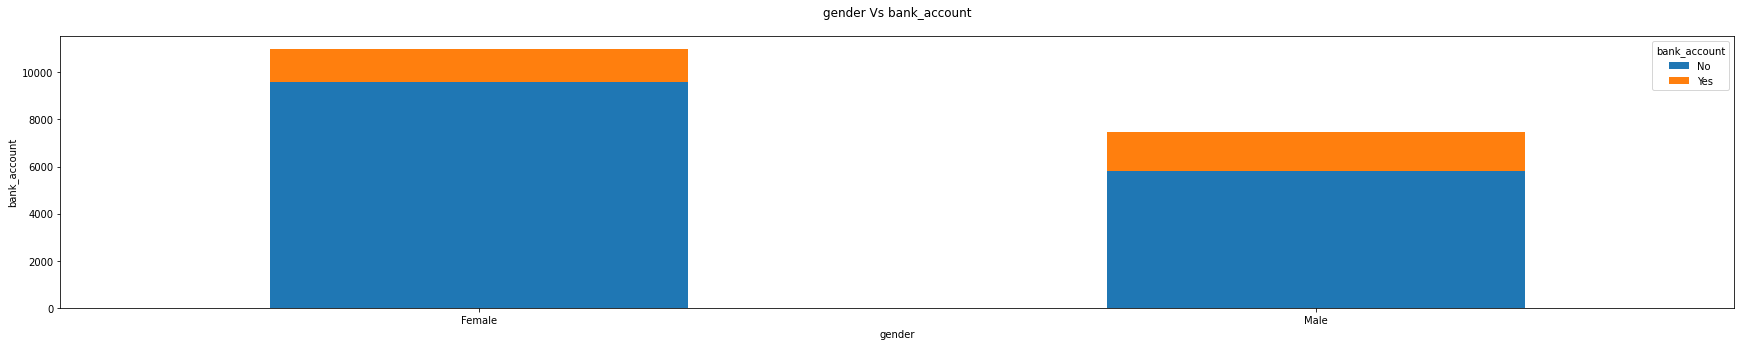

In [ ]:
# Plot
TabPlot('gender', 'bank_account', financial_inclusion_cleaned)

* Majority of the respondents were female, and majority had no bank accounts.
* Males are observed to have a higher number of bank account holders.

**Bank Account Vs Relationship**

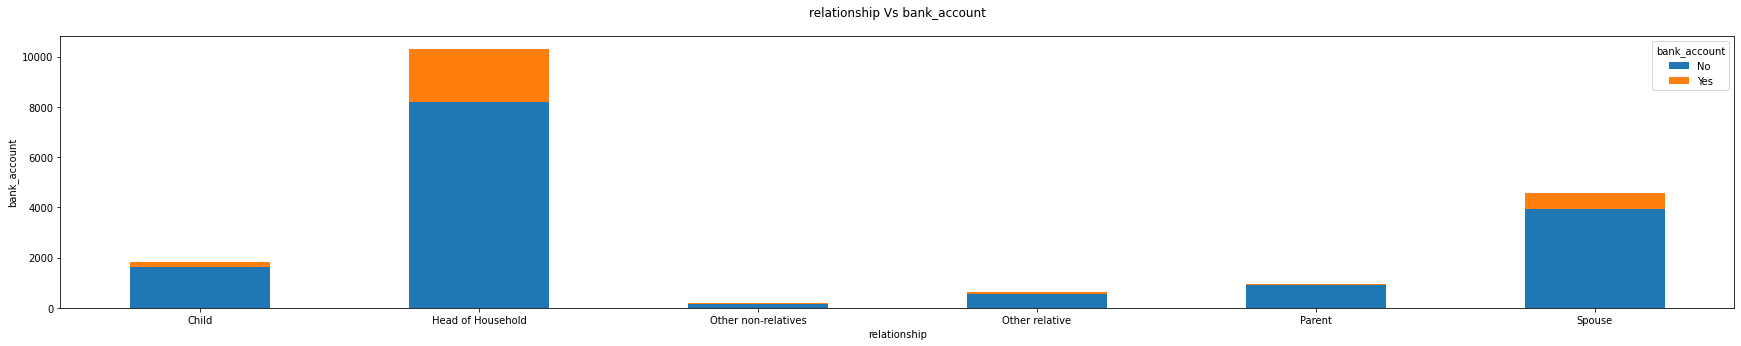

In [ ]:
# Plot
TabPlot('relationship', 'bank_account', financial_inclusion_cleaned)

* Most respondents did not have bank accounts.
* Most respondents were the heads of the household, followed by their spouses, their children, parent, relative,and finally non-relatives.

**Bank Account Vs Marital Status**

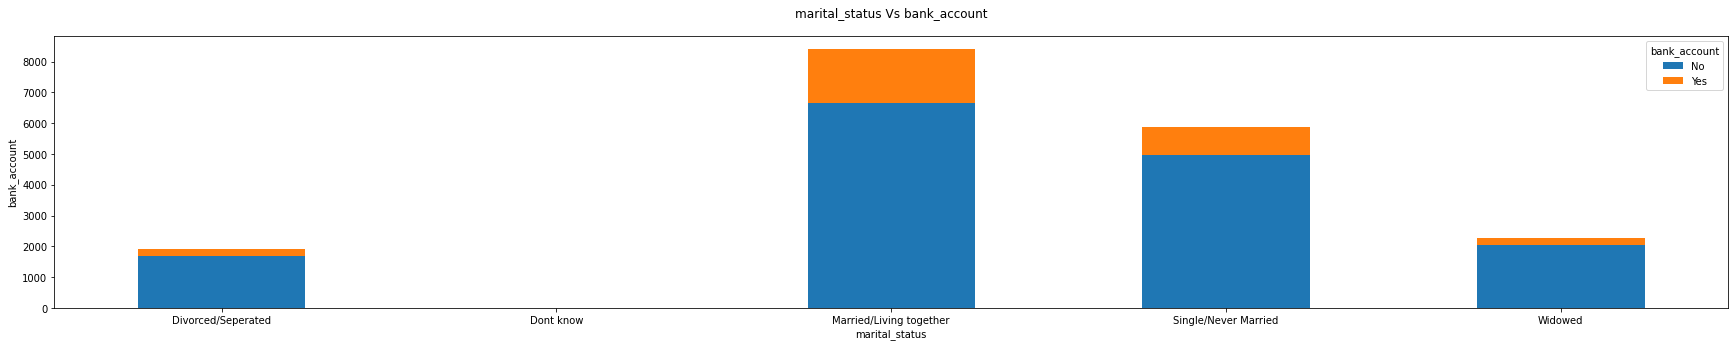

In [ ]:
# Plot
TabPlot('marital_status', 'bank_account', financial_inclusion_cleaned)

* Most respondents do mot have bank accounts.
* Majority of the respondents were married or living together.
* Those who were married or living together had the most bank accounts. Followed by those who had never been married. 

**Bank Acount Vs Education**

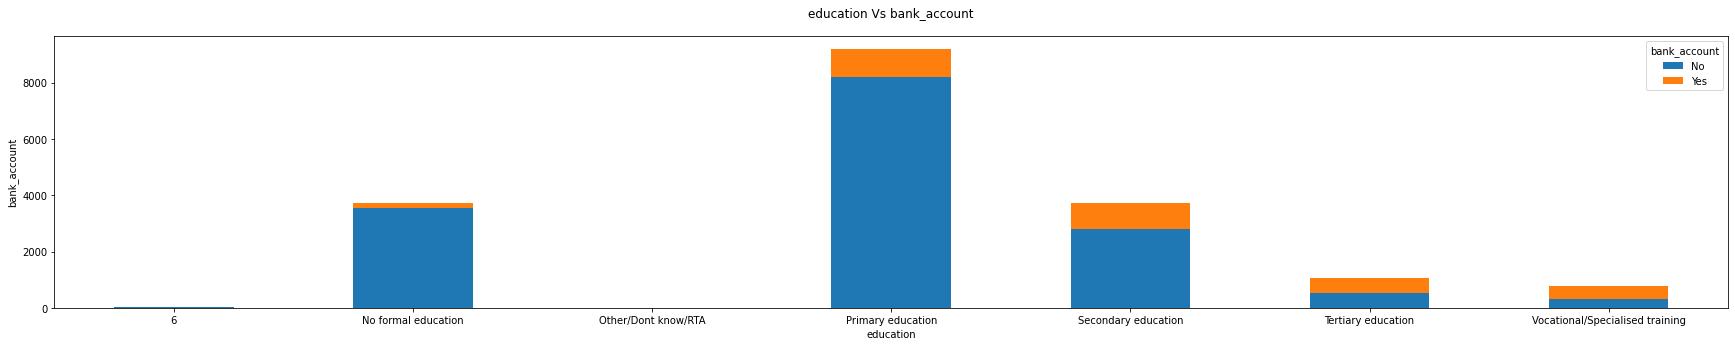

In [ ]:
# Plot
TabPlot('education', 'bank_account', financial_inclusion_cleaned)

* Most respondents had a primary education, followed by secondary education at second place.
* They had the highest number of bank account holders.
* Those with tertiary or vocational education had an almost even distribution of account holders.
* Majority of respondents with no formal education did not have bank accounts.

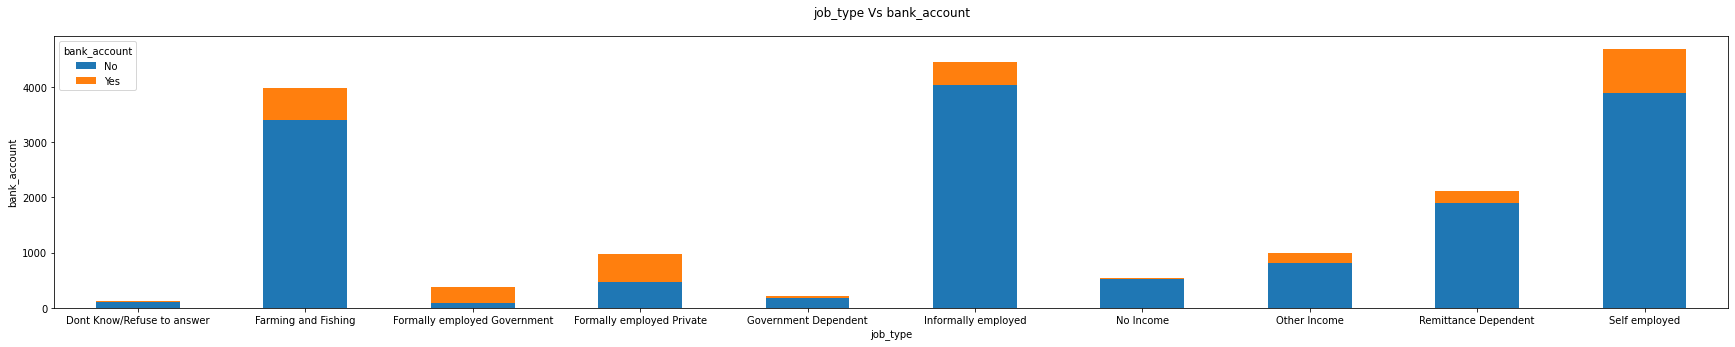

In [ ]:
# Plot
TabPlot('job_type', 'bank_account', financial_inclusion_cleaned)

* Most job types had majority of the repsondents lacking bank accounts, apart from those who were privately employed (even distribution) and those who were formally employed by the government (majority have accounts).
* Most respondents were self- employed, followed by those who were informally employed, then farmers and fishermen/fisherwomen. The number of account holders follows the same ranking.

**ii) Numerical-Numerical**

In [ ]:
numerical

['year', 'household_size', 'age']

In [ ]:
# Bar plot function
def BarPlotBiv(x,y, data):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(data[x], data[y])
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

In [ ]:
# Correlation function
def Corr(x, y):
  corr_coeff = financial_inclusion_cleaned[x].corr(financial_inclusion_cleaned[y])
  print(f'Correlation Coefficient {x}-{y} = {corr_coeff}')

**Year Vs Household Size**

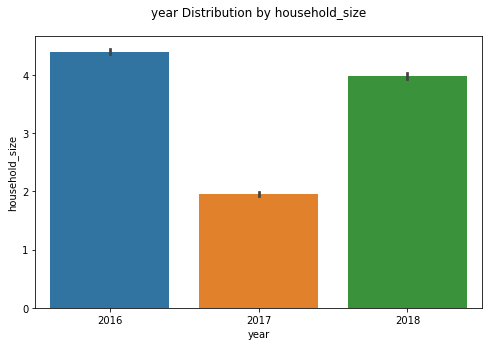

In [ ]:
# Plot
BarPlotBiv('year', 'household_size', financial_inclusion_cleaned)

Rwanda had the highest average household size. To determine the proper distribution, a bivariate analysis on the country and household size need to be done.

In [ ]:
# Correlation coefficient
Corr('year', 'household_size')

Correlation Coefficient year-household_size = -0.07133319201578796


The columns have no (extremely weak negative) correlation to each other.



**Year Vs Age**

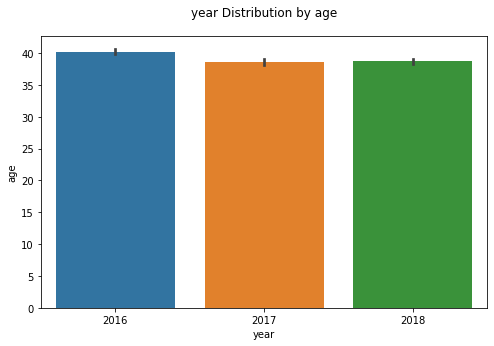

In [ ]:
# Plot
BarPlotBiv('year', 'age', financial_inclusion_cleaned)

Rwanda had the highest avaerage respondent age. To determine the proper distribution, a bivariate analysis on the country and age need to be done.

In [ ]:
# Correlation coefficient
Corr('age', 'household_size')

Correlation Coefficient age-household_size = -0.1143593367089563


The columns have no (extremely weak negative) correlation to each other.

**Household Size and Age**

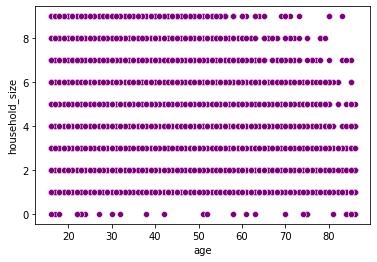

In [ ]:
# Plot
sns.scatterplot(financial_inclusion_cleaned['age'], financial_inclusion_cleaned['household_size'], color = 'purple')

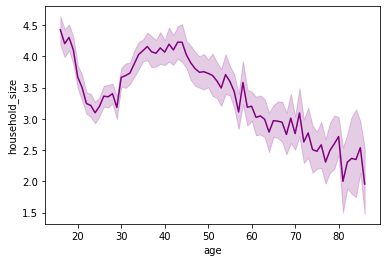

In [ ]:
# Plot
sns.lineplot(financial_inclusion_cleaned['age'], financial_inclusion_cleaned['household_size'], color = 'purple')

* From the age up to 25, the household size steadily decreases. This could be due to respondents moving out of their parents' houses.
* From 25 to 45, the respendent household size increases, steadily dropping at a constant rate.

In [ ]:
# Correlation coefficient
Corr('age', 'household_size')

Correlation Coefficient age-household_size = -0.1143593367089563


There is no (very weak and negative) correlation between the columns.

**iii) Numerical-Categorical**

**Bank Account Vs Age**

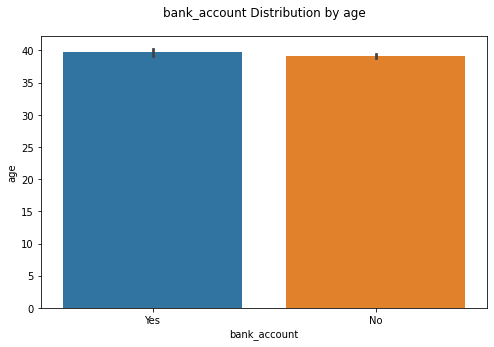

In [ ]:
# Plot
BarPlotBiv('bank_account', 'age', financial_inclusion_cleaned)

Those with a bank account had a slightly higher average age of aroud 40, than those without.

**Bank Acount Vs Household Size**

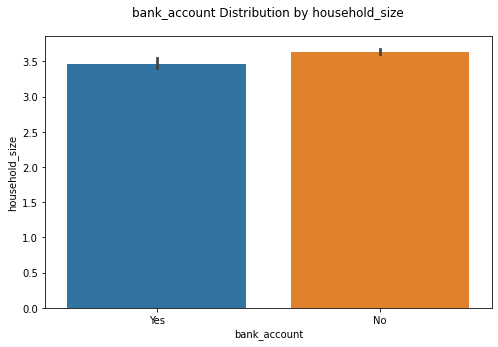

In [ ]:
# Plot
BarPlotBiv('bank_account', 'household_size', financial_inclusion_cleaned)

Those without bank account had larger avagerage household sizes.

**Bank Account Vs Year**

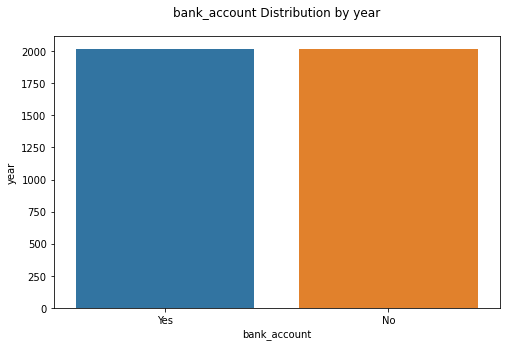

In [ ]:
# Plot
BarPlotBiv('bank_account', 'year', financial_inclusion_cleaned)

The year column only depicts the year that a year's data was collected. Therefore, the plot of the bank account vs country properly explains this information.

*Implementing the suggestions from the Numerical-Numerical section*

**Country Vs Household**

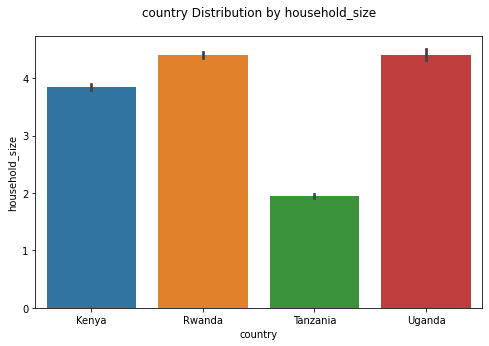

In [ ]:
# Plot
BarPlotBiv('country', 'household_size', financial_inclusion_cleaned)

* In the household size vs year plot, 2018 had the second highest average house size. 2018 represents Kenta and Uganda.
* From the plot, Uganda has a higher avergage house size than Kenya.

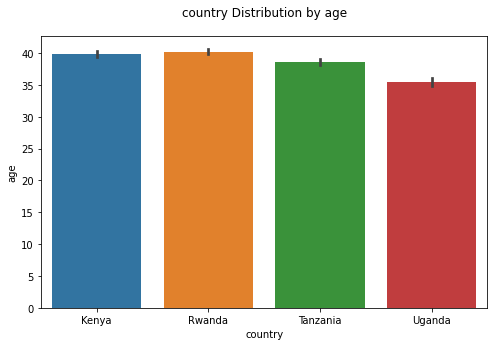

In [ ]:
# Plot
BarPlotBiv('country', 'age', financial_inclusion_cleaned)

* From the Age vs Country plot, 2016 had the highest respondent average age of 40, followed by 2017 and 2018.
* The plot above provides a clearer destinction. Rwanda has the highest average age of 40. For Kenya, the age is around 39 years. Third comes Tanzania then Uganda.
* All have an average age range of 35 - 40 years.

*Taking the year column to be categorical*

In [ ]:
financial = financial_inclusion_cleaned.copy()
financial['year'] = financial['year'].astype('object')

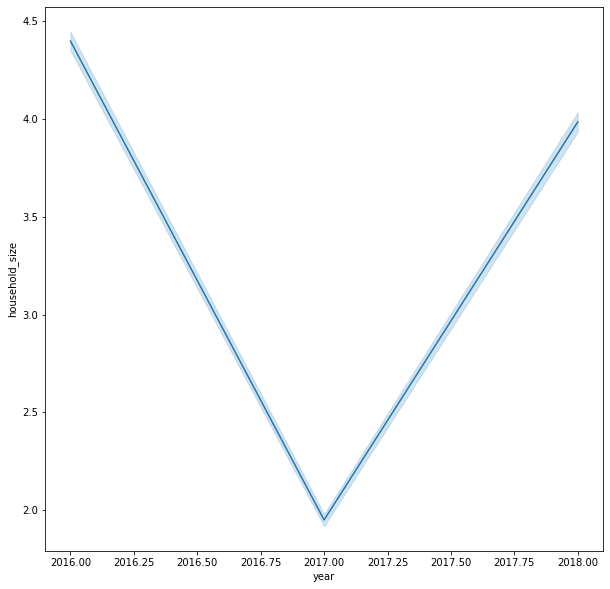

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.lineplot(financial['year'], financial['household_size'])

A bar plot better represents the year column. Converting the column to object had not improved the graph display.

**Z-Score**

In [ ]:
# Splittind the dataset into two datasets of those with and without bank accounts.
yes = financial_inclusion_cleaned[financial_inclusion_cleaned.bank_account == 'Yes']
no = financial_inclusion_cleaned[financial_inclusion_cleaned.bank_account == 'No']

In [ ]:
# Obtaining the Zscores
data = yes[['age', 'household_size']]
z_score = np.abs(stats.zscore(data))
threshold = 3
print(np.where(z_score > 3))

(array([ 274,  301,  412,  449,  612,  682,  872, 2076, 2716]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [ ]:
# Outliers
data.iloc[[ 274,  301,  412,  449,  612,  682,  872, 2076, 2716]]

,age,household_size
1168,85,1
1251,85,4
1646,84,2
1795,86,1
2530,84,5
2776,86,2
3567,83,1
11757,83,2
18907,86,2


An outliers are present in age colum, in the dataset where respondents have bank accounts. The ages range from 83 to 86.

In [ ]:
# Obtaining the Zscores
data = no[['age', 'household_size']]
z_score = np.abs(stats.zscore(data))
threshold = 3
print(np.where(z_score > 3))

(array([], dtype=int64), array([], dtype=int64))


No outliers are present in the second dataset of non-account holders.

**Independent T-Test**

*1. Descriptive Statistics*

In [ ]:
# Age column description
financial_inclusion_cleaned.groupby('bank_account')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
bank_account,,,,,,,,
No,15398.0,39.159826,16.999638,16.0,25.0,35.0,50.0,86.0
Yes,3077.0,39.703607,14.266433,16.0,29.0,36.0,48.0,86.0


In [ ]:
# Household size description
financial_inclusion_cleaned.groupby('bank_account')['household_size'].describe()

,count,mean,std,min,25%,50%,75%,max
bank_account,,,,,,,,
No,15398.0,3.641512,2.144321,0.0,2.0,3.0,5.0,9.0
Yes,3077.0,3.470263,2.039797,0.0,2.0,3.0,5.0,9.0


*2. Conditions*

It is assumed that:
* The samples were independently and randomly drawn
* The distribution of the residuals between the two groups follow a normal distribution
* The variances between the two groups are equal

*Variance Homegenity*

In [ ]:
# Levene Test, age column.
stats.levene(yes['age'], no['age'])

LeveneResult(statistic=165.3669494854752, pvalue=1.1037058360869103e-37)

In [ ]:
# Levene Test, household size column.
stats.levene(yes['household_size'], no['household_size'])

LeveneResult(statistic=10.961582223833041, pvalue=0.0009319861089075783)

For both columns, p < 0.05, therefore the alternative hypotheis of significant variance between the independent groups is rejected. Thta is, the test is not significant and there is homogenity of variances.

*Normality*

In [ ]:
# Visual test function
def NormalityTest(data1, data2, col): 
  # Residuals 
  diff = data1[col].values - data2[col].values  

  # Probalility plot 
  stats.probplot(diff, plot= plt)
  plt.title(f'{col} P-P Plot') 
  plt.show()

  # Histogram 
  diff = pd.Series(diff)
  title = f'{col} Residuals'
  diff.plot(kind= "hist", title= title)
  plt.xlabel(col) 
  plt.show()

  # Shapiro Normality Test
  test_statistic, p_value = stats.shapiro(diff)
  print(f"Test statistic = {test_statistic}")
  print(f"P-Value = {p_value}")

**Age Column**

In [ ]:
# Age column
# NormalityTest(no, yes, 'age')

The datasets cannot be broadcast, as there are a larger number of respondent without account.

In [ ]:
# Limiting the no dataset

# Dataset lengths
print(no.shape)
print(yes.shape)

no2 = no.iloc[:3077]

(15398, 12)
(3077, 12)


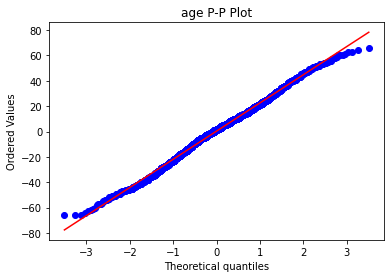

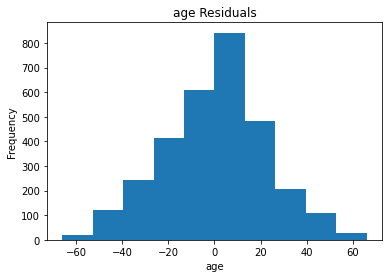

Test statistic = 0.9964990019798279
P-Value = 1.3952610515843844e-06


In [ ]:
# Second trial
NormalityTest(yes, no2,'age')

* As depictded in the P-P plot, the values fall along the line of best fit, therefore, the distribution seems to be normal.
* However, the p-value < 0.05, therefore, the test is statistically significant. The normaility test fails, as the data significanlty deviates from a normal distribution.
* The T-Test fails.

**Household Size Column**

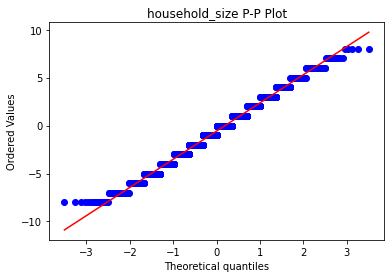

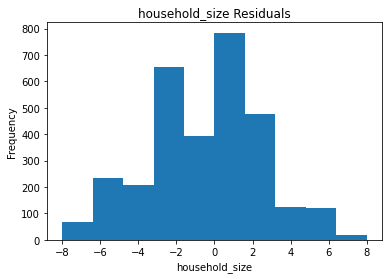

Test statistic = 0.9884472489356995
P-Value = 3.9503926829210795e-15


In [ ]:
# Household size group comparisson
NormalityTest(yes, no2,'household_size')

* The data points deviate from the line of best fit, therefore, the distribution is not normal.
* This obervation is confirmed as the p-value < 0.05, therefore, the test is statistically significant. The normaility test fails, as the data significanlty deviates from a normal distribution.
* The T-Test fails.

### c) Multivariate Analysis

**Correlation**

In [ ]:
# Correlation matrix
financial_inclusion_cleaned.corr()

,year,household_size,age
year,1.000000,-0.071333,-0.037997
household_size,-0.071333,1.000000,-0.114359
age,-0.037997,-0.114359,1.000000


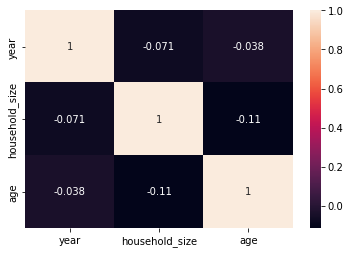

In [ ]:
# Correlation Heatmap
sns.heatmap(financial_inclusion_cleaned.corr(), annot = True)

The numerical columns have very weak or no correlation with each other.

**Pair Plot**

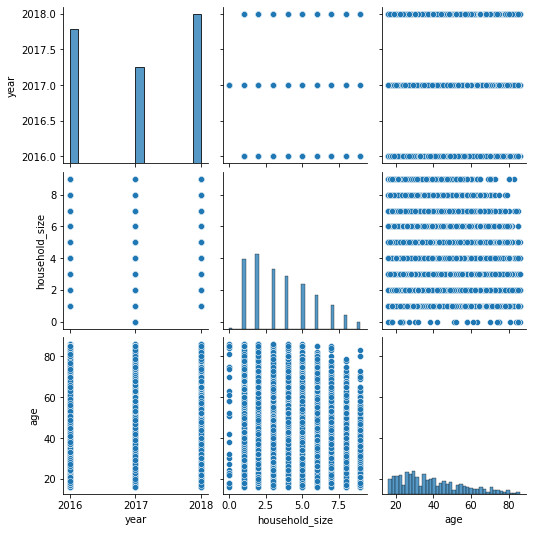

In [ ]:
# Numerical column pairplot.
sns.pairplot(financial_inclusion_cleaned)

The plot clearly shows the lack of correlation between the numerical columns.

**Preprocessing**

In [ ]:
# Categorical variables
categorical

['country',
 'bank_account',
 'location',
 'cellphone',
 'gender',
 'relationship',
 'marital_status',
 'education',
 'job_type']

**One-Hot Encoding**

In [ ]:
# Non-ordinal categories
# country, bank_account, location, cellphone, relationship, job_type
non_ordinal = ['country', 'location', 'cellphone','gender', 'relationship', 
               'job_type']



In [ ]:
# One Hot Encoding
financial_inclusion_encoded = pd.get_dummies(financial_inclusion_cleaned, columns = non_ordinal)
financial_inclusion_encoded.shape

(18475, 32)

In [ ]:
financial_inclusion_encoded.columns

Index(['year', 'bank_account', 'household_size', 'age', 'marital_status',
       'education', 'country_Kenya', 'country_Rwanda', 'country_Tanzania',
       'country_Uganda', 'location_Rural', 'location_Urban', 'cellphone_No',
       'cellphone_Yes', 'gender_Female', 'gender_Male', 'relationship_Child',
       'relationship_Head of Household', 'relationship_Other non-relatives',
       'relationship_Other relative', 'relationship_Parent',
       'relationship_Spouse', 'job_type_Dont Know/Refuse to answer',
       'job_type_Farming and Fishing', 'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed'],
      dtype='object')

**Label Encoding**

In [ ]:
ordinal = ['marital_status', 'education']

In [ ]:
# Converting categorical columns to numerical columns
label_encoder = preprocessing.LabelEncoder()
# Encoding columns
financial_inclusion_encoded[ordinal]= financial_inclusion_encoded[ordinal].apply(label_encoder.fit_transform)
financial_inclusion_encoded.head()

,year,bank_account,household_size,age,marital_status,education,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,Yes,3,24,2,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,No,5,70,4,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,Yes,5,26,3,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,No,5,34,2,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,No,8,26,3,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Dividing the dataset into features and label.
X = financial_inclusion_encoded.drop('bank_account', axis = 1)
y = financial_inclusion_encoded['bank_account']

In [ ]:
# Splitting data into the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Normalization**

In [ ]:
# Numerical columns
numerical.append('year')

In [ ]:
# Only scaling the numerical columns
sc = StandardScaler()
X_train[numerical] = sc.fit_transform(X_train[numerical])
X_test[numerical] = sc.transform(X_test[numerical])

***PCA*** 

In [ ]:
# Applying PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.26270885e-01, 1.55256136e-01, 1.21593981e-01, 1.07617744e-01,
       8.90968945e-02, 5.88705140e-02, 4.82814437e-02, 3.72135458e-02,
       2.95929900e-02, 2.27441836e-02, 2.09527617e-02, 1.52425730e-02,
       1.39681888e-02, 1.30862317e-02, 1.01526771e-02, 6.29723685e-03,
       6.06509582e-03, 4.99900742e-03, 4.03510681e-03, 3.22919212e-03,
       2.17624905e-03, 1.32049184e-03, 1.16133119e-03, 7.75539869e-04,
       2.24337878e-31, 1.31723442e-32, 1.41174208e-33, 1.41174208e-33,
       1.41174208e-33, 1.41174208e-33, 1.41174208e-33])

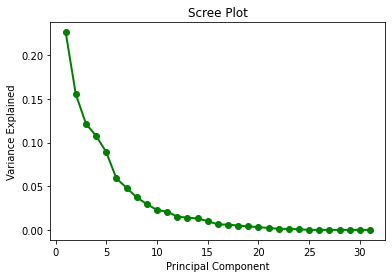

In [ ]:
# Scree plot

pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, explained_variance, 'o-', linewidth=2, color='green')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

There seems to be high colleniarity between the variables.

**Selecting Principle Components, Model Training and Evaluation**

In [ ]:
# Function used to test the accuracy when different number of principle 
# components are used.
def TrainEvaluate(components, train, test):
  # Selecting the number of components components
  pca = PCA(n_components= components)
  train = pca.fit_transform(train)
  test = pca.transform(test)

  # Model training
  randForestClass = RandomForestClassifier(max_depth=2, random_state=0)
  randForestClass.fit(X_train, y_train)

  # Predicting the test set results
  y_pred = randForestClass.predict(X_test)

  # Confusion Matrix
  from sklearn.metrics import confusion_matrix # Re-imported to prevent error
  confusion_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix")
  print(confusion_matrix, "\n")
  print("Accuracy Score")
  print(accuracy_score(y_test, y_pred))

In [ ]:
# When all components are used
TrainEvaluate(0, X_train, X_test)

Confusion Matrix
[[3084    9]
 [ 559   43]] 

Accuracy Score
0.8462787550744248


In [ ]:
# From sklearn documentaion
# tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

The resulting accuracy is 84% (0.8462787550744248). 

1. True Negative = 3091
2. False Positive = 5
3. False Negative = 582
4. True Positive = 16

In [ ]:
# Negative Predicetd Value
npv = 3091/(3091+582)
npv

0.8415464198203104

In [ ]:
# When 6 are used
TrainEvaluate(6, X_train, X_test)

Confusion Matrix
[[3084    9]
 [ 559   43]] 

Accuracy Score
0.8462787550744248


The accuracy becomes 83%. The accuracy drops. Therefore, all the components will be considered.

## Implementing the Solution

From the previous PCA analysis, all variables are necessary for predicting individual with or without a bankmaccount.



In [ ]:
financial_inclusion_cleaned.columns

Index(['country', 'year', 'bank_account', 'location', 'cellphone',
       'household_size', 'age', 'gender', 'relationship', 'marital_status',
       'education', 'job_type'],
      dtype='object')

In [ ]:
categorical2 = categorical.copy()
categorical2.remove('bank_account')

In [ ]:
numerical2 = numerical.copy()
numerical2.remove('year')

In [ ]:
# Individuals most likely to have a bank account.
# Function that displays the most favourable variable values for likely account holdres.
def AccountHolders(num, data, columns, columns2):
  for column in columns:
    print(data[column].value_counts().head(num), "\n")

  for column in columns2:
    print(f'{column} mode = {data[column].mode()} \n')
AccountHolders(1, yes, categorical2, numerical2)

Kenya    1429
Name: country, dtype: int64 

Rural    1542
Name: location, dtype: int64 

Yes    2982
Name: cellphone, dtype: int64 

Male    1672
Name: gender, dtype: int64 

Head of Household    2098
Name: relationship, dtype: int64 

Married/Living together    1738
Name: marital_status, dtype: int64 

Primary education    1011
Name: education, dtype: int64 

Self employed    793
Name: job_type, dtype: int64 

household_size mode = 0    1
dtype: int64 

age mode = 0    30
dtype: int64 

year mode = 0    2018
dtype: int64 



Individuals who are from Kenyan rural regions, with cellphones, are Male and heads of the household, are married or living together, had a primary education and are self-employed, are 30 years of age and have a household size of 1, are most likely to hold bankn accounts in East Africa.

## Challenging the solution

In [ ]:
# One Hot Encoding
test_data_encoded = pd.get_dummies(financial_inclusion_cleaned, columns = non_ordinal)
# Converting categorical columns to numerical columns
label_encoder = preprocessing.LabelEncoder()
# Encoding columns
test_data_encoded[ordinal]= test_data_encoded[ordinal].apply(label_encoder.fit_transform)
test_data_encoded.head()
# Dividing the dataset into features and label.
X1 = test_data_encoded.drop('bank_account', axis = 1)
y1 = test_data_encoded['bank_account']
# Splitting data into the training and testing datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
# Only scaling the numerical columns
sc = StandardScaler()
X1_train[numerical] = sc.fit_transform(X1_train[numerical])
X1_test[numerical] = sc.transform(X1_test[numerical])
# Applying PCA
pca = PCA()
X1_train = pca.fit_transform(X1_train)
X1_test = pca.transform(X1_test)
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.26270885e-01, 1.55256136e-01, 1.21593981e-01, 1.07617744e-01,
       8.90968945e-02, 5.88705140e-02, 4.82814437e-02, 3.72135458e-02,
       2.95929900e-02, 2.27441836e-02, 2.09527617e-02, 1.52425730e-02,
       1.39681888e-02, 1.30862317e-02, 1.01526771e-02, 6.29723685e-03,
       6.06509582e-03, 4.99900742e-03, 4.03510681e-03, 3.22919212e-03,
       2.17624905e-03, 1.32049184e-03, 1.16133119e-03, 7.75539869e-04,
       2.24337878e-31, 1.31723442e-32, 1.41174208e-33, 1.41174208e-33,
       1.41174208e-33, 1.41174208e-33, 1.41174208e-33])

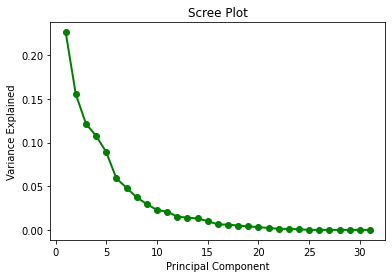

In [ ]:
# Scree plot
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, explained_variance, 'o-', linewidth=2, color='green')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

There seems to be similar high colleniarity between the variables for the imputed dataset.

**Selecting Principle Components, Model Training and Evaluation**

In [ ]:
# Function used to test the accuracy when different number of principle 
# components are used.
def TrainEvaluate(components, train, test):
  # Selecting the number of components components
  pca = PCA(n_components= components)
  train = pca.fit_transform(train)
  test = pca.transform(test)

  # Model training
  randForestClass = RandomForestClassifier(max_depth=2, random_state=0)
  randForestClass.fit(X1_train, y1_train)

  # Predicting the test set results
  y1_pred = randForestClass.predict(X1_test)

  # Confusion Matrix
  from sklearn.metrics import confusion_matrix # Re-imported to prevent error
  confusion_matrix = confusion_matrix(y1_test, y1_pred)
  print("Confusion Matrix")
  print(confusion_matrix, "\n")
  print("Accuracy Score")
  print(accuracy_score(y1_test, y1_pred))

In [ ]:
# When all components are used
TrainEvaluate(0, X1_train, X1_test)

Confusion Matrix
[[3084    9]
 [ 559   43]] 

Accuracy Score
0.8462787550744248


In [ ]:
# When one components is used
TrainEvaluate(1, X1_train, X1_test)

Confusion Matrix
[[3084    9]
 [ 559   43]] 

Accuracy Score
0.8462787550744248


The resulting accuracy is 84%  (now = 0.8462787550744248 , 
prev = 0.8462787550744248). 

1. True Negative = 3084(3091)
2. False Positive = 9(5)
3. False Negative = 559(582)
4. True Positive = 43(16)

The accuracy remains the same.

In [ ]:
# Negative Predicetd Value
npv = 3091/(3091+582)
print(f"Previous NPV = {npv}")
npv2 = 3084/(3084 + 559)
print(f"New NPV = {npv2}")

Previous NPV = 0.8415464198203104
New NPV = 0.8465550370573703


However, the NPV for the imputed values is minutely higher, therefore, it has a slighlty better performance.

In [ ]:
# When 6 are used
TrainEvaluate(6, X1_train, X1_test)

Confusion Matrix
[[3084    9]
 [ 559   43]] 

Accuracy Score
0.8462787550744248


* The accuracy of 84% is maintained even when fewer components are used. When values were dropped, the model accuracy dropped by 1% for the same case.
* The multicollinearity for the imputed dataset seems to be higher, making it more robust to changes in the number of principle  components used.